In [18]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


BLOCK 1: Imports & Setup

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings
warnings.filterwarnings("ignore")

plt.style.use("default")

BLOCK 2: Load Dataset

In [3]:
df = pd.read_csv('/content/Retail_Sales_Data_Unlox (1).csv')

df.head()

,Date,Store_ID,Store_Location,Product_ID,Product_Category,Product_Subcategory,Brand,Unit_Price,Units_Sold,Total_Sales,Discount_Percentage,Revenue,Customer_Type,Payment_Mode,Promotion_Applied,Stock_On_Hand,Store_Rating,Region,Holiday_Flag
0,2023-04-13,STR_104,Chennai,PRD_072,Sports,Athletics,Reebok,29973.06,39,1168949.34,5,1.110502e+06,Returning,Debit Card,Yes,422,4.4,South,0
1,2024-10-25,STR_103,Delhi,PRD_492,Sports,Outdoor,Yonex,46933.78,2,93867.56,15,7.978743e+04,Returning,UPI,No,302,4.1,North,0
2,2023-02-28,STR_107,Kolkata,PRD_958,Groceries,Household,Nestle,39280.28,44,1728332.32,15,1.469082e+06,Returning,Cash,No,184,3.8,East,0
3,2023-06-16,STR_102,Bangalore,PRD_014,Home Appliances,Kitchen,Whirlpool,40439.03,9,363951.27,5,3.457537e+05,New,UPI,Yes,493,3.7,South,0
4,2024-05-23,STR_108,Ahmedabad,PRD_932,Fashion,Women Clothing,Puma,9193.58,4,36774.32,5,3.493560e+04,Returning,Credit Card,No,359,3.5,West,0


BLOCK 3: Basic Inspection

In [4]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73000 entries, 0 to 72999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 73000 non-null  object 
 1   Store_ID             73000 non-null  object 
 2   Store_Location       73000 non-null  object 
 3   Product_ID           73000 non-null  object 
 4   Product_Category     73000 non-null  object 
 5   Product_Subcategory  73000 non-null  object 
 6   Brand                73000 non-null  object 
 7   Unit_Price           73000 non-null  float64
 8   Units_Sold           73000 non-null  int64  
 9   Total_Sales          73000 non-null  float64
 10  Discount_Percentage  73000 non-null  int64  
 11  Revenue              73000 non-null  float64
 12  Customer_Type        73000 non-null  object 
 13  Payment_Mode         73000 non-null  object 
 14  Promotion_Applied    73000 non-null  object 
 15  Stock_On_Hand        73000 non-null 

,0
Date,0
Store_ID,0
Store_Location,0
Product_ID,0
Product_Category,0
Product_Subcategory,0
Brand,0
Unit_Price,0
Units_Sold,0
Total_Sales,0


BLOCK 4: Date Conversion

In [7]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Month_Name'] = df['Date'].dt.month_name()

df.head()

,Date,Store_ID,Store_Location,Product_ID,Product_Category,Product_Subcategory,Brand,Unit_Price,Units_Sold,Total_Sales,...,Customer_Type,Payment_Mode,Promotion_Applied,Stock_On_Hand,Store_Rating,Region,Holiday_Flag,Year,Month,Month_Name
0,2023-04-13,STR_104,Chennai,PRD_072,Sports,Athletics,Reebok,29973.06,39,1168949.34,...,Returning,Debit Card,Yes,422,4.4,South,0,2023,4,April
1,2024-10-25,STR_103,Delhi,PRD_492,Sports,Outdoor,Yonex,46933.78,2,93867.56,...,Returning,UPI,No,302,4.1,North,0,2024,10,October
2,2023-02-28,STR_107,Kolkata,PRD_958,Groceries,Household,Nestle,39280.28,44,1728332.32,...,Returning,Cash,No,184,3.8,East,0,2023,2,February
3,2023-06-16,STR_102,Bangalore,PRD_014,Home Appliances,Kitchen,Whirlpool,40439.03,9,363951.27,...,New,UPI,Yes,493,3.7,South,0,2023,6,June
4,2024-05-23,STR_108,Ahmedabad,PRD_932,Fashion,Women Clothing,Puma,9193.58,4,36774.32,...,Returning,Credit Card,No,359,3.5,West,0,2024,5,May


BLOCK 5: Total Sales Trend Over Time

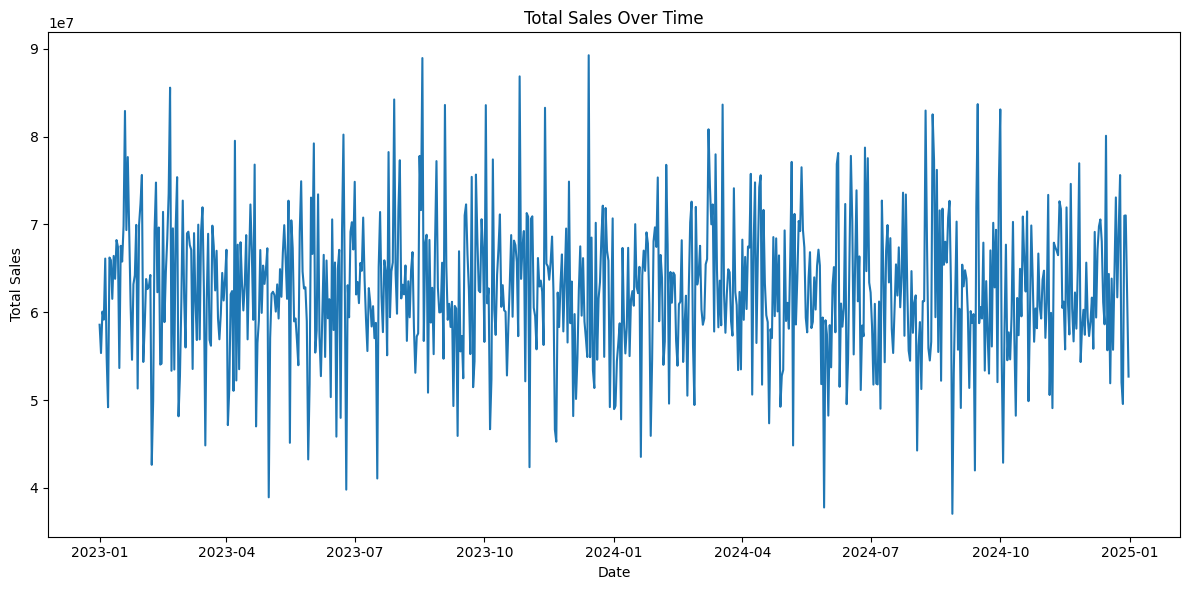

In [27]:
sales_over_time = df.groupby('Date')['Total_Sales'].sum().reset_index()

plt.figure(figsize=(12,6))
plt.plot(sales_over_time['Date'], sales_over_time['Total_Sales'])
plt.title("Total Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.tight_layout()
plt.savefig("/content/drive/MyDrive/Retail Analytics & AI-Powered Sales Forecasting System/outputs/sales_trends.png")
plt.show()

BLOCK 6: Monthly Sales Trend

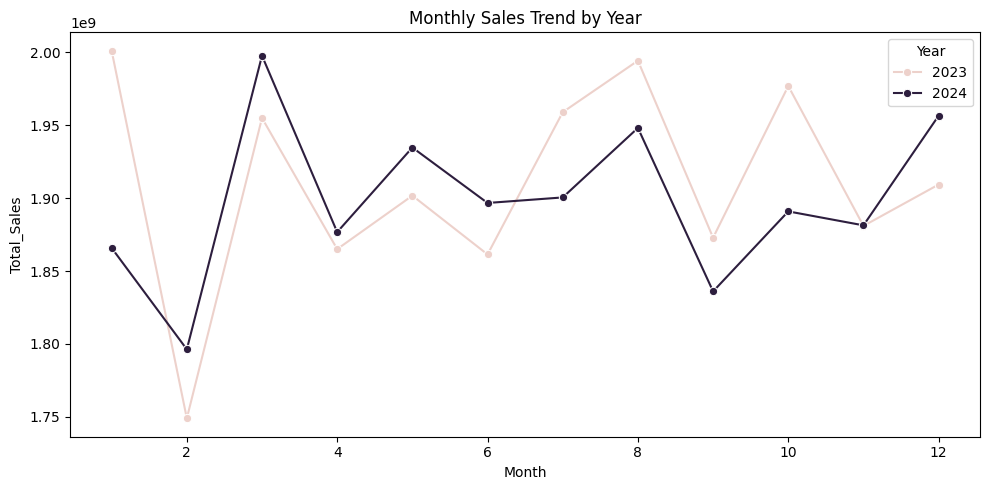

In [20]:
monthly_sales = df.groupby(['Year','Month'])['Total_Sales'].sum().reset_index()

plt.figure(figsize=(10,5))
sns.lineplot(data=monthly_sales, x='Month', y='Total_Sales', hue='Year', marker='o')
plt.title("Monthly Sales Trend by Year")
plt.tight_layout()
plt.savefig("/content/drive/MyDrive/Retail Analytics & AI-Powered Sales Forecasting System/outputs/monthly_sales_trend.png")
plt.show()

 BLOCK 7: Category-wise Sales Analysis

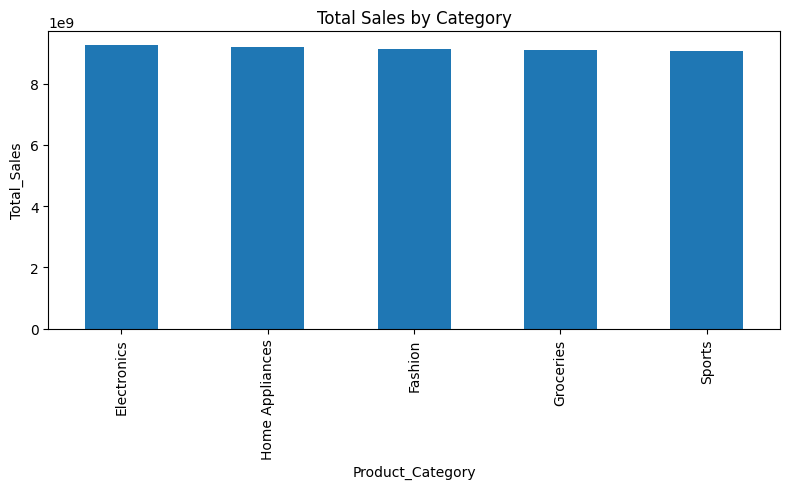

In [22]:
category_sales = df.groupby('Product_Category')['Total_Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(8,5))
category_sales.plot(kind='bar')
plt.title("Total Sales by Category")
plt.xlabel("Product_Category")
plt.ylabel("Total_Sales")
plt.tight_layout()
plt.savefig("/content/drive/MyDrive/Retail Analytics & AI-Powered Sales Forecasting System/outputs/category_sales.png")
plt.show()

BLOCK 8: Top 10 Stores by Sales

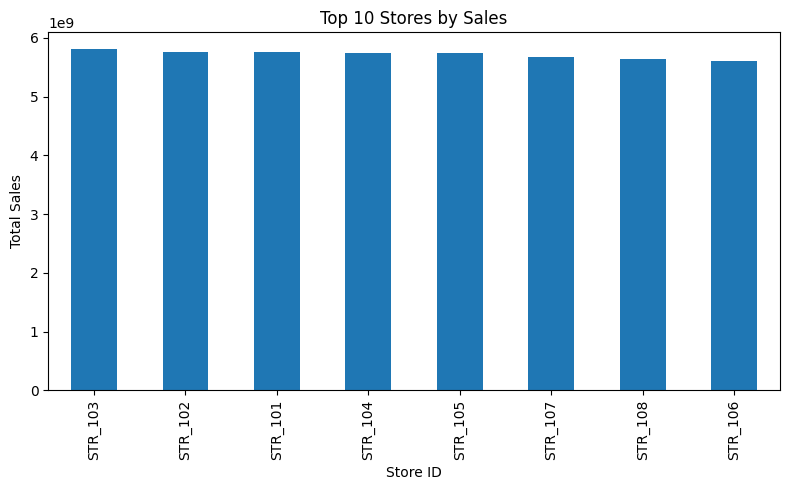

In [24]:
top_stores = df.groupby('Store_ID')['Total_Sales'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(8,5))
top_stores.plot(kind='bar')
plt.title("Top 10 Stores by Sales")
plt.xlabel("Store ID")
plt.ylabel("Total Sales")
plt.tight_layout()
plt.savefig("/content/drive/MyDrive/Retail Analytics & AI-Powered Sales Forecasting System/outputs/sales_trends.png")
plt.show()

BLOCK 9: Store Segmentation

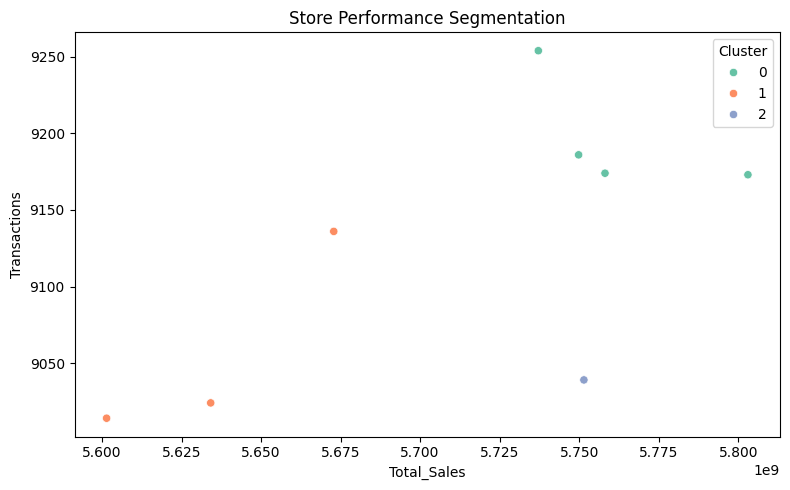

In [26]:
store_perf = df.groupby('Store_ID').agg({
    'Total_Sales':'sum',
    'Date':'count'
}).rename(columns={'Date':'Transactions'}).reset_index()

scaler = StandardScaler()
scaled_data = scaler.fit_transform(store_perf[['Total_Sales','Transactions']])

kmeans = KMeans(n_clusters=3, random_state=42)
store_perf['Cluster'] = kmeans.fit_predict(scaled_data)

plt.figure(figsize=(8,5))
sns.scatterplot(
    data=store_perf,
    x='Total_Sales',
    y='Transactions',
    hue='Cluster',
    palette='Set2'
)
plt.title("Store Performance Segmentation")
plt.tight_layout()
plt.savefig("/content/drive/MyDrive/Retail Analytics & AI-Powered Sales Forecasting System/outputs/sales_trends.png")
plt.show()

BLOCK 10: Monthly Aggregation for Forecasting

In [28]:
monthly_ts = df.set_index('Date').resample('M')['Total_Sales'].sum()

monthly_ts.head()

,Total_Sales
Date,
2023-01-31,2.001128e+09
2023-02-28,1.748971e+09
2023-03-31,1.954974e+09
2023-04-30,1.865035e+09
2023-05-31,1.901729e+09


BLOCK 11: Train-Test Split

In [29]:
train = monthly_ts[:-6]
test = monthly_ts[-6:]

BLOCK 12: SARIMA Forecasting

In [30]:
model = SARIMAX(
    train,
    order=(1,1,1),
    seasonal_order=(1,1,1,12)
)

results = model.fit()

forecast = results.forecast(steps=6)

BLOCK 13: Forecast Plot

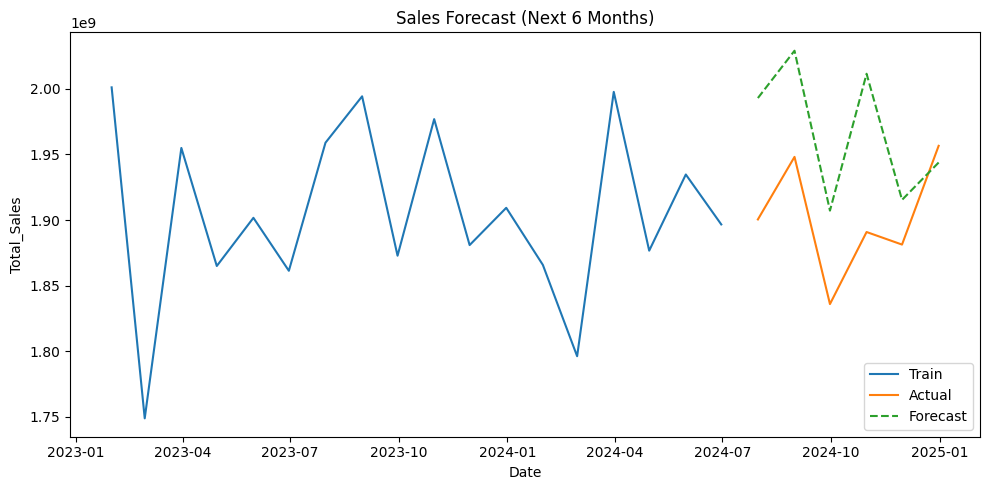

In [31]:
plt.figure(figsize=(10,5))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Actual')
plt.plot(forecast.index, forecast, label='Forecast', linestyle='--')

plt.title("Sales Forecast (Next 6 Months)")
plt.xlabel("Date")
plt.ylabel("Total_Sales")
plt.legend()
plt.tight_layout()
plt.savefig("/content/drive/MyDrive/Retail Analytics & AI-Powered Sales Forecasting System/outputs/sales_trends.png")
plt.show()

## Business Insights & Recommendations

- Sales exhibit clear seasonal trends, with peak performance during specific months.
- Certain product categories contribute disproportionately to overall revenue.
- Store segmentation identifies high-performing stores that can be used as benchmarks.
- Low-performing clusters may require pricing or inventory optimization.
- Forecasted sales enable proactive demand planning and inventory control.

This AI-powered analytics system provides actionable insights for retail management,
supporting data-driven decision-making.